<a href="https://colab.research.google.com/github/ekaratnida/Data_Streaming_and_Realtime_Analytics/blob/main/workshop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data journey: From raw data to insights

# Use case: Youtube comment analytics


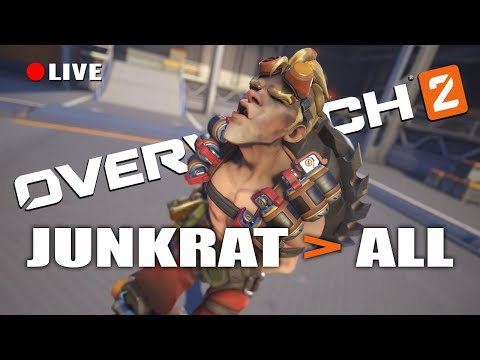

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('VDQFqn0evfM')
# https://www.youtube.com/watch?v=VDQFqn0evfM

## 1. Data collection

In [ ]:
!pip install pytchat #https://github.com/taizan-hokuto/pytchat/wiki

In [ ]:
import pytchat
import pandas as pd
chat = pytchat.create(video_id="VDQFqn0evfM")

dList = []
aList = []
mList = []

i = 0
rows = 10
while chat.is_alive():
  for c in chat.get().sync_items():
    print(f"{c.datetime} [{c.author.name}]-{c.message}")
    dList.append(c.datetime)
    aList.append(c.author.name)
    mList.append(c.message)
    i = i+1
    if i == rows:
      chat.terminate()
      break

# dictionary of lists
dict = {'datetime': dList, 'authorname': aList, 'message': mList}

df = pd.DataFrame(dict)
df.head()

from google.colab import files
df.to_csv("data.csv", encoding="utf_8_sig", index=False) #cp874, #TIS-620
files.download("data.csv")

## 2. Sentiment analysis

In [10]:
!pip install -q transformers

In [11]:
from transformers import pipeline
sp = pipeline(model="poom-sci/WangchanBERTa-finetuned-sentiment")

In [ ]:
import pytchat
import pandas as pd
chat = pytchat.create(video_id="VDQFqn0evfM")

dList = []
aList = []
mList = []
sList = []
i = 0
rows = 10
while chat.is_alive():
  for c in chat.get().sync_items():
    data = sp([c.message])[0]
    print(f"{c.datetime} [{c.author.name}]-{c.message},  sentiment --> { data['label']   }")
    dList.append(c.datetime)
    aList.append(c.author.name)
    mList.append(c.message)
    sList.append(data['label'])
    i = i+1
    if i == rows:
      chat.terminate()
      break

# dictionary of lists
dict = {'datetime': dList, 'authorname': aList, 'message': mList, 'sentiment':sList}

df = pd.DataFrame(dict)
df.head()

from google.colab import files
df.to_csv("data_sentiment.csv", encoding="utf_8_sig", index=False) #cp874, #TIS-620
files.download("data_sentiment.csv")

In [18]:
import pandas as pd
df = pd.DataFrame(dict)
df.head()

,datetime,authorname,message,sentiment
0,2022-10-11 13:11:02,elghazi,มาาาา,pos
1,2022-10-11 13:11:07,Kitinan.o_c,ละดูหน้า,neu
2,2022-10-11 13:11:21,ohpreams ‘94,มาาาาาาาาาา,neu
3,2022-10-11 13:11:24,Coson,มีคนติดโอเวอร์วอทททททท2,neu
4,2022-10-11 13:11:30,waniillust,มาาาาา,pos


In [ ]:
df.info()

In [ ]:
#df.sentiment.unique()
#df.sentiment.nunique()
#df.groupby(['sentiment']).nunique().plot(kind='pie',y='datetime')